<a href="https://colab.research.google.com/github/yakupkaplan/Covid-19-Detection-Using-X-Ray-Images/blob/main/Covid_19_Detection_using_X_Ray_Images_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Detection using X-Ray Images

In this notebook we try to detect COVID-19 by using x-ray images.

__Datasets to be used:__ 
1. [Covid Chest X Ray Dataset](https://github.com/ieee8023/covid-chestxray-dataset) -> used for covid-19 positive images
2. [Pneumonia dataset by Praveen](https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset) -> pneumonia negative images used for covid-19 negative images

-> By using these datasets 500 Covid-19 positive images and 1600 Covid-19 negative images are created.

__References:__
1. https://www.youtube.com/watch?v=ol0OYJoBC4A&list=PLeR1DH-2kjIr_IZZIC64Mmf5wKEdekRZU&index=11

In [ ]:
# Google Colab Identification
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changing working directory
import os 
root = '/content/drive/MyDrive/Colab Notebooks/Covid-19 Detection Using X-Ray Images'
os.chdir(root)
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Covid-19 Detection Using X-Ray Images'

In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

In [ ]:
# Import data and target that we saved earlier
data = np.load('data.npy')
target = np.load('target.npy')

In [ ]:
# Define input features
input_shape = data.shape[1:] #50,50,1
inputs = Input(shape = input_shape)

# Create/Design the model architecture
convs = []

parrallel_kernels = [3,5,7] # We will use parallel kernels

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k], padding = 'same', activation = 'relu', input_shape = input_shape, strides = 1)(inputs)
    convs.append(conv)

outputs = Concatenate()(convs)
conv_model = Model(inputs=inputs, outputs=outputs)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,input_dim=128,activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Let's take a look at the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 98, 98, 64)        221248    
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_3 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)       

In [ ]:
# Split the dataset into train and test sets -> 10% data will be used for testing
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.1)

In [ ]:
# Create a model checkpoint - The models will be saved that surpase the model before
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')

# Train the model - 10% as the validation data
history = model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/20
50/50 [==============================] - 7s 131ms/step - loss: 0.5588 - accuracy: 0.7065 - val_loss: 0.1377 - val_accuracy: 0.9548
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
50/50 [==============================] - 6s 128ms/step - loss: 0.1696 - accuracy: 0.9494 - val_loss: 0.0442 - val_accuracy: 0.9944
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
50/50 [==============================] - 6s 128ms/step - loss: 0.1089 - accuracy: 0.9687 - val_loss: 0.0535 - val_accuracy: 0.9887
Epoch 4/20
50/50 [==============================] - 6s 129ms/step - loss: 0.0793 - accuracy: 0.9734 - val_loss: 0.0238 - val_accuracy: 0.9887
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
50/50 [==============================] - 6s 130ms/step - loss: 0.0661 - accuracy: 0.9741 - val_loss: 0.0434 - val_accuracy: 0.9831
Epoch 6/20
50/50 [==============================] - 6s 128ms/step - loss: 0.1130 - accuracy: 0.9585 - val_loss: 0.01

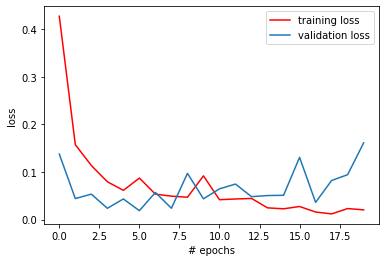

In [ ]:
# Let's interpret the model performance by comparing the train and test loss
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

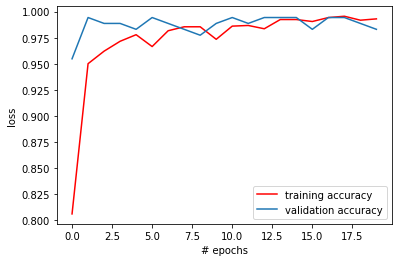

In [ ]:
# Let's interpret the model performance by comparing the train and test accuracy
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

- For both train and test data losses are decreasing and accuracies are increasing.
- So it is a good sign for the model.
- There is no sign for Overfitting.
- The model can be trained for more epochs for better accuracy.
- By plot for losss and accuracy, we have similar indications. It is a good sign.

In [ ]:
# Evaluate the model
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 0s 45ms/step - loss: 0.0932 - accuracy: 0.9694
[0.09315331280231476, 0.9693877696990967]


In [ ]:
# Create requirements.txt file to save dependencies versions
# !pip install -r requirements.txt
# !pip3 freeze > requirements.txt